### Lecture 3 of Computational Aspectes of Machine Learning: course 2021-2022
If you have questions about this notebook contact Melissa Lopez at m.lopez@uu.nl

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import GaussianMixture

color = ['cornflowerblue', 'darkorange', 'mediumseagreen']

Here we load the data and resample it to have a $(samples, features)$ structure.

In [2]:
# We load the data
data = np.load('./data/1000_glitches.npy')

# (samples, 1, features) --> (samples, features)
data = data.reshape(data.shape[0], data.shape[2])
print(data.shape)

(1000, 938)


We want to cluster the data in 3 classes. Let's use k-Means.

In [4]:
# We fix the random state to reproduce the results.
random_state = 170
clusters = 3 
# This is our clustering algorithm.
kmeans = KMeans(n_clusters=clusters, random_state=random_state)

# And we want to fit and predict all our data.
kmeans_pred = kmeans.fit_predict(data)

How can we visualize our data? We have 938 $features$, so we might want to reduce our dimensionality with PCA.

In [5]:
# We decompose our data in 2 components for better visualization
pca = PCA(n_components=2)

# And we want to fit and decompose all our data.
pca_data = pca.fit_transform(data)
print(pca_data.shape)

# 1st PCA component
pca1 = pca_data[:, 0]

# 2nd PCA component
pca2 = pca_data[:, 1]

(1000, 2)


We will store PCA components and k-Means labels in a pandas DataFrame

In [7]:
results = pd.DataFrame({'PCA 1': pca1, 'PCA 2': pca2, 'Labels': kmeans_pred})
display(results)

,PCA 1,PCA 2,Labels
0,1.629584,-0.507421,0
1,-2.018157,-0.721535,2
2,-0.738842,-1.951903,0
3,1.826200,4.669151,1
4,0.868556,-0.608222,0
...,...,...,...
995,1.160501,0.973785,1
996,1.243735,0.971269,1
997,0.321739,-1.591889,0
998,-2.422662,2.523152,2


Let's visualize our data.

<AxesSubplot:xlabel='PCA 1', ylabel='PCA 2'>

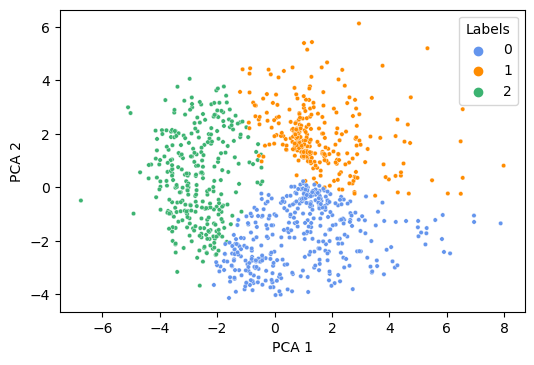

In [9]:
fig = plt.figure(dpi=100)
sns.scatterplot(data = results, x='PCA 1', y='PCA 2', hue='Labels',
                palette=color, s=10)

Let's repeat the process with Gaussian Mixtures.

<AxesSubplot:xlabel='PCA 1', ylabel='PCA 2'>

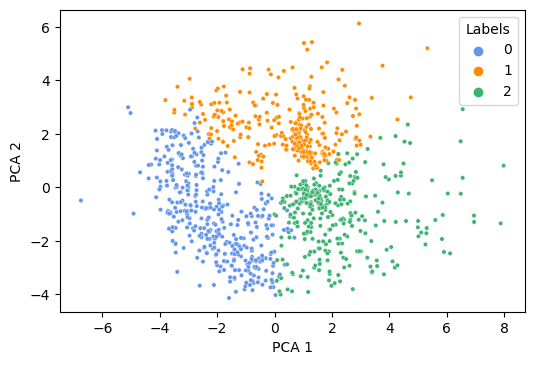

In [10]:
random_state = 170
clusters = 3 

gm = GaussianMixture(n_components=clusters, random_state=random_state).fit(data)
gm_pred = gm.predict(data)

results_gm = pd.DataFrame({'PCA 1': pca1, 'PCA 2': pca2, 'Labels': gm_pred})

fig = plt.figure(dpi=100)
sns.scatterplot(data = results_gm, x='PCA 1', y='PCA 2', hue='Labels',
                palette=color, s=10)

We can see some diferences: some samples that were classified in a certain class with K-means, now are in separated classes with Gaussian Mixtures. Can you plot some examples where this is the case?

Can you plot some of the samples in the outskirts of the distributions? Are they similar or different to the ones in the bulk?